<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Data Extraction

In [1]:
import numpy as np
import os
# import xlrd
import openpyxl as xl
import pandas as pd
# from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as pl
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns
from plotly.offline import iplot, plot, init_notebook_mode
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
import plotly
plotly.tools.set_credentials_file(username='garyhan', api_key='jb6utiwqOF7F3bAuf1Td')
init_notebook_mode(connected=True)

import math
from math import factorial
#import Image
import numpy as np

In [2]:
os.chdir('/Users/changnianhan/Downloads/simulation/')
# os.chdir('/Users/changnianhan/OneDrive/Research/Platelets/results/')
# os.chdir('C:/Users/garyh/OneDrive/Research/Platelets/results/')
# os.listdir('.')

In [21]:
workbook = xl.load_workbook("test.xlsx")
# workbook.remove(workbook['test'])
# workbook.remove(workbook['test2'])
# workbook.save("test.xlsx")
print(workbook.sheetnames)

['f2-30']


In [3]:
def move_avg(nums, window):
    l = len(nums)
    new_nums = []
    for i in range(window,l+1):
        new_nums.append(sum(nums[i-window:i])/window)
    return new_nums

In [22]:
f2_30 = workbook['f2-30']
t = [x.value for x in f2_30['a'] if x.value is not None]
E_t = [x.value for x in f2_30['h'] if x.value is not None]
E_r = [x.value for x in f2_30['i'] if x.value is not None]
w = 100
E_t = move_avg(E_t, w)
E_r = move_avg(E_r, w)

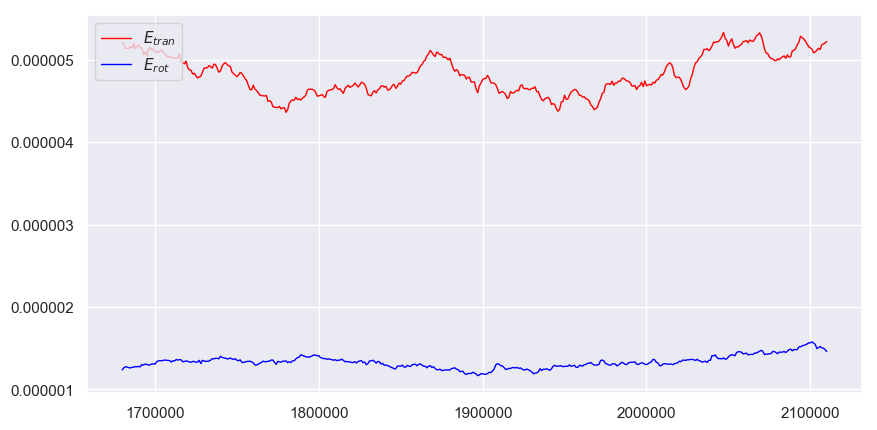

In [23]:
sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") # paper, notebook, talk, poster
fig = pl.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot(111)
ax.plot(t[w-1:], E_t, marker='', color='red', linewidth=1, alpha=1, label='$E_{tran}$')
ax.plot(t[w-1:], E_r, marker='', color='blue', linewidth=1, alpha=1, label='$E_{rot}$')
# axes[0].plot(np.linspace(-2, 2, 2), y_fit5, linestyle='--', color='darkorange', linewidth=1, alpha=1, label='fit-5')
# axes[0].plot(np.linspace(-2, 2, 2), y_fit2, linestyle='--', color='purple', linewidth=1, alpha=1, label='fit-2')
ax.legend(loc=2, ncol=1)
# axes[0].set_title("Velocity Profile ("+shear+")")#, loc='center', fontsize=10, fontweight=0, color='black')
# axes[0].set_xlim(xlo, xhi)
# axes[0].set_ylim(-45, 45)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0000005))

In [3]:
def extract_E(input_f, output_f, sheetname, rows):
#     output_f = '/Users/changnianhan/OneDrive/Research/Platelets/results/' + output_f
#     output_f = 'C:/Users/garyh/OneDrive/Research/Platelets/results/' + output_f
    wb = xl.load_workbook(output_f)
    if sheetname in wb.sheetnames:
        wb.remove(wb[sheetname])
    if sheetname not in wb.sheetnames:
        wb.create_sheet(sheetname)
    sheet = wb[sheetname]
#     time_unit = 0.0005 * 2.08
#     energy_unit = 1.271
    with open(input_f, 'r') as in_f:
        for line in in_f:
            if 'Press' in line:
                line = next(in_f)
#                 num = line.strip().split()
#                 mystep, tran, rot, temp = int(num[0]), float(num[3]), float(num[4]), float(num[5])
#                 print(mystep, end=' ')
                for j in range(rows):
                    line = next(in_f,0)
                    if line == 0:
                        break
                    if 'WARNING' in line:
                        line = next(in_f)
                    num = line.strip().split()
                    if not num[0].isdigit():
                        break
#                     tran += float(num[-3])
#                     rot += float(num[-2])
#                     temp += float(num[-1])
#                     print(j, end=" ")
                    sheet.append(tuple([float(x) for x in num]))
#                     sheet.append(tuple([int(num[0]), float(num[3]), float(num[4]), float(num[5])]))
#     sheet.append(tuple(''))
    wb.save(output_f)

In [4]:
extract_E('screen', 'test.xlsx', 'f2-30', 5000)

In [ ]:
def write_excel(input_f, output_f, sheetname, rows):
#     output_f = '/Users/changnianhan/OneDrive/Research/Platelets/results/' + output_f
    wb = xl.load_workbook(output_f)
#     if sheetname not in wb.sheetnames:
#         wb.create_sheet(sheetname)
    sheet = wb[sheetname]
    i = 52
    with open(input_f, 'r') as in_f:
        for line in in_f:
            if 'Press' in line:
#                 mystep, tran, rot, temp = int(num[0]), float(num[3]), float(num[4]), float(num[5])
                for j in range(rows):
                    line = next(in_f)
                    if 'WARNING' in line:
                        line = next(in_f)
                    num = line.strip().split()
                    sheet.cell(row=i,column=27).value = float(num[3])
                    sheet.cell(row=i,column=28).value = float(num[4])
                    sheet.cell(row=i,column=29).value = float(num[5])
                    i += 10
#     sheet.append(tuple(''))
    wb.save(output_f)
    print("Saved!")

In [ ]:
write_excel('screen-tq-ine', 'flip-spin.xlsx', 'f2-30', 5)